In [ ]:
#  Завдання 1:

Перші 5 рядків датасету Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


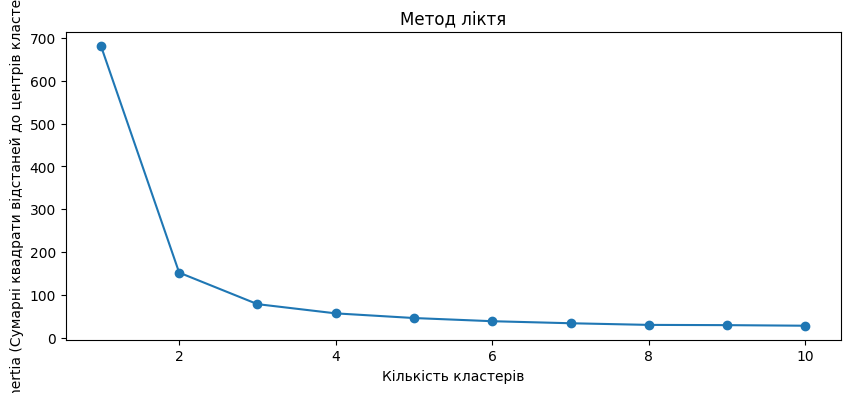

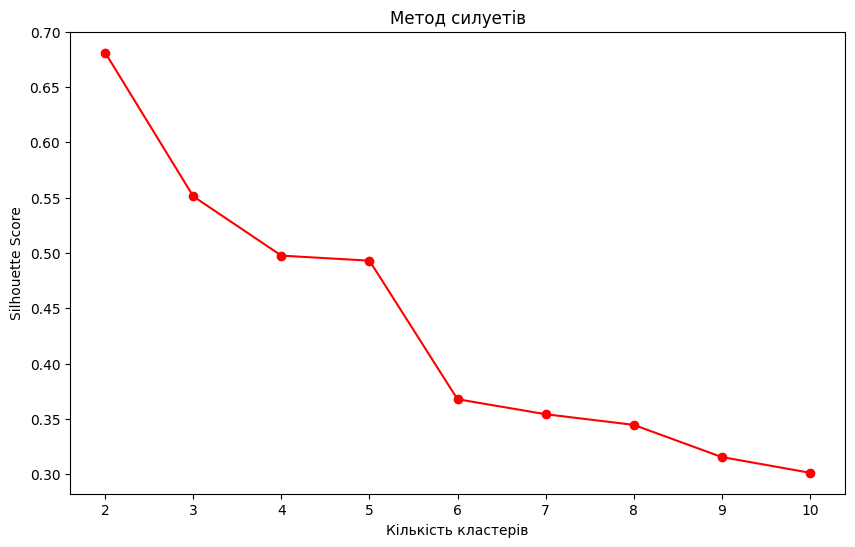

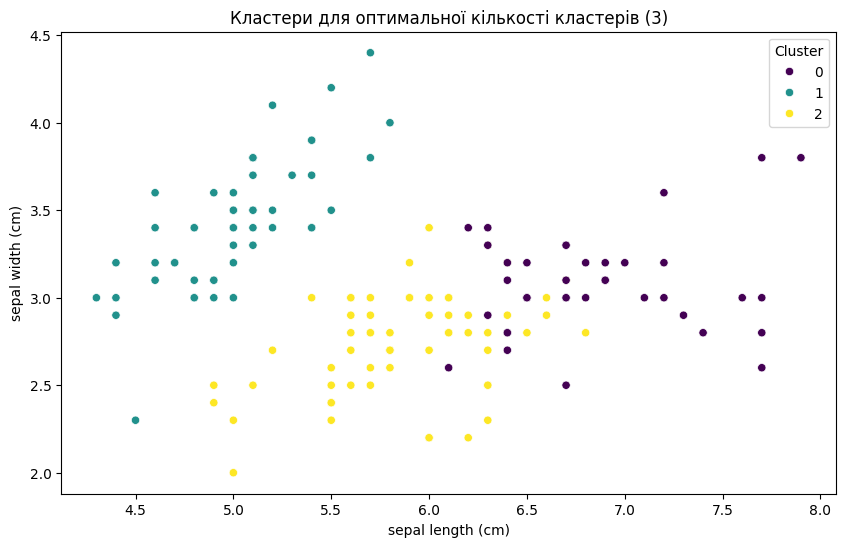

In [1]:
# Імпорт необхідних бібліотек
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження датасету Iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Вивід перших 5 рядків датасету
print("Перші 5 рядків датасету Iris:")
print(iris_df.head())

# Визначення оптимальної кількості кластерів методом ліктя
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    inertia.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(10, 4))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia (Сумарні квадрати відстаней до центрів кластерів)')
plt.show()

# Визначення оптимальної кількості кластерів методом силуетів
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(iris_df)
    silhouette_scores.append(silhouette_score(iris_df, cluster_labels))
# Візуалізація методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.show()
# Візуалізація кластерів для оптимальної кількості кластерів (наприклад, 3 кластери)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
iris_df['Cluster'] = kmeans.fit_predict(iris_df)
# Візуалізація кластерів на перших двох ознаках
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x=iris.feature_names[0], y=iris.feature_names[1], hue='Cluster', palette='viridis')
plt.title(f'Кластери для оптимальної кількості кластерів ({optimal_clusters})')
plt.show()

#Висновок: метод ліктя та метод силуетів показали, що оптимальна кількість кластерів дорівнює 3. Ці кластери відповідають трьом різним видам квітів у наборі даних Iris.


In [ ]:
# Завдання 2:

Перші 5 рядків нового датасету:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Розмір датасету: (768, 9)

Типи даних:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigre

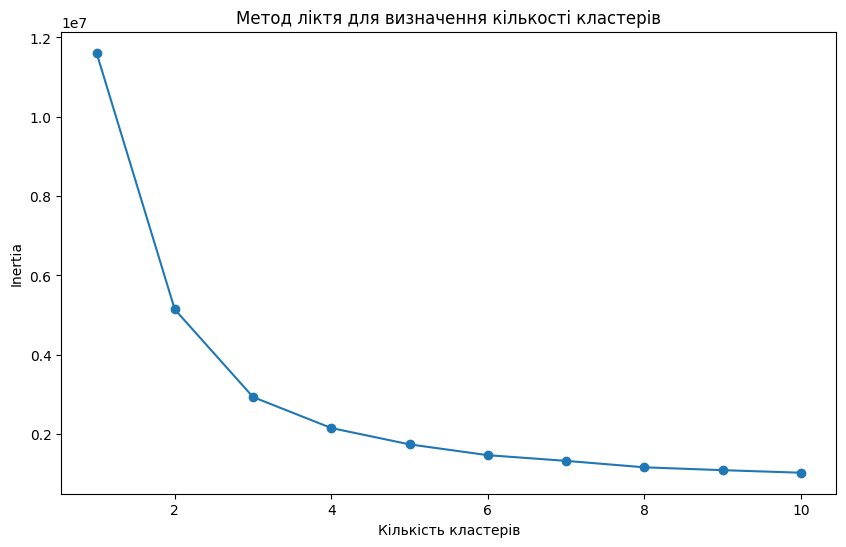

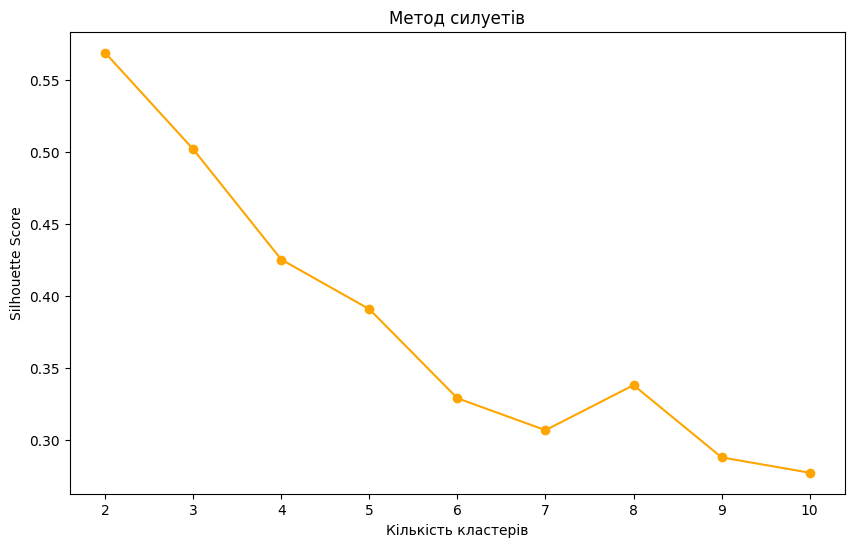

In [ ]:
# Імпорт бібліотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження нового датасету
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(dataset_url, names=columns)

# Виведення перших 5 рядків
print("Перші 5 рядків нового датасету:")
print(data.head())

# Розмір та типи даних
print("\nРозмір датасету:", data.shape)
print("\nТипи даних:")
print(data.dtypes)

# Перевірка на пропущені значення
print("\nПеревірка на пропущені значення:")
print(data.isnull().sum())

# Заповнення пропущених значень середнім
data.fillna(data.mean(), inplace=True)

# Перевірка на дублікати
print("\nПеревірка на дублікати:")
print("Кількість дублікатів:", data.duplicated().sum())

# Видалення дублікатів
data = data.drop_duplicates()

# Описова статистика
print("\nОписова статистика:")
print(data.describe())

# Визначення типу задачі (регресія чи класифікація)
print("\nВизначення типу задачі: Класифікація, оскільки стовпець 'Outcome' має два значення (0, 1)")

# Вибір ознак та цільової змінної
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Розподіл даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизація даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Моделі для порівняння
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Навчання та оцінка моделей
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} - Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

# Кластеризація та метод ліктя
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Метод ліктя для визначення кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

# Метод силуетів
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Візуалізація методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.show()

# Висновок: на основі методів ліктя та силуетів оптимальна кількість кластерів становить 2 або 3.
